In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
## diccionaries
catalogo = pd.read_excel("../BaseDatos.xlsx", sheet_name="Catalogo")
catalogo = catalogo[["Articulo", "Precio", "Costo", "TiempoVidaAnaquel", "Tamaño_Surtido"]].dropna()
for i in catalogo.columns:
    catalogo.rename(columns={i: i.lower().replace("ñ", "n")}, inplace=True)

catalogo.rename(columns={"articulo":"sku"}, inplace=True)
catalogo["ganancia_uni"] = catalogo["precio"]-catalogo["costo"]
catalogo["pro_ganacia"] = catalogo["ganancia_uni"]/catalogo["costo"]
catalogo.head()

,sku,precio,costo,tiempovidaanaquel,tamano_surtido,ganancia_uni,pro_ganacia
0,Art01,7.77,5.44,14.0,1.0,2.33,0.428309
1,Art02,25.67,15.40,10.0,3.0,10.27,0.666883
2,Art03,27.23,17.70,12.0,2.0,9.53,0.538418
3,Art04,20.49,10.25,7.0,1.0,10.24,0.999024
4,Art05,23.35,16.35,14.0,1.0,7.00,0.428135


In [63]:
catalogo.head(10)

,sku,precio,costo,tiempovidaanaquel,tamano_surtido,ganancia_uni,pro_ganacia
0,Art01,7.77,5.44,14.0,1.0,2.33,0.428309
1,Art02,25.67,15.40,10.0,3.0,10.27,0.666883
2,Art03,27.23,17.70,12.0,2.0,9.53,0.538418
3,Art04,20.49,10.25,7.0,1.0,10.24,0.999024
4,Art05,23.35,16.35,14.0,1.0,7.00,0.428135
5,Art06,29.58,23.66,10.0,2.0,5.92,0.250211
6,Art07,29.59,22.19,12.0,1.0,7.40,0.333484
7,Art08,35.63,23.16,10.0,1.0,12.47,0.538428
8,Art09,18.08,10.85,14.0,1.0,7.23,0.666359
9,Art10,29.32,20.52,10.0,1.0,8.80,0.428850


In [3]:
ventas = pd.read_csv("../data/ventas_sku_loc_week.csv")
ventas.columns= [x.lower() for x in ventas.columns]
ventas["id"] = ventas["sku"]+"_"+ventas["loc"]
ventas.set_index("fecha", inplace=True)
ventas.head()

,sku,loc,uni,id
fecha,,,,
2019-04-07,Art01,LOC_001,2.0,Art01_LOC_001
2019-04-14,Art01,LOC_001,8.0,Art01_LOC_001
2019-04-21,Art01,LOC_001,2.0,Art01_LOC_001
2019-04-28,Art01,LOC_001,10.0,Art01_LOC_001
2019-05-05,Art01,LOC_001,3.0,Art01_LOC_001


### 10 articulos-tiendas aleatorias

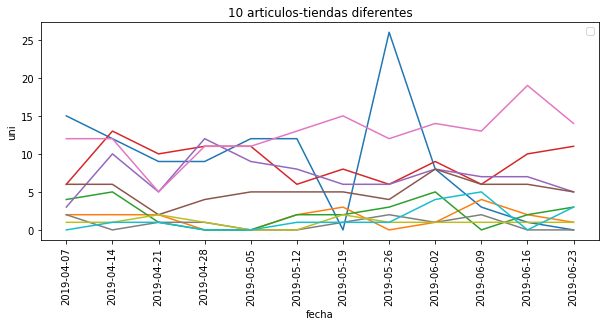

In [4]:
np.random.seed(19970808)
test_id = list(np.random.choice(ventas["id"].unique(), 10))
ventas_test = ventas[ventas["id"].isin(test_id)]
plt.figure(figsize=(10,4))
sns.lineplot(x=ventas_test.index, y=ventas_test["uni"], hue=ventas_test["id"])
plt.xticks(rotation=90)
plt.legend([])
plt.title("10 articulos-tiendas diferentes")
plt.show()

**Observaciones**
- Limpiar outliers
- 

### 10 articulos en diferentes tiendas

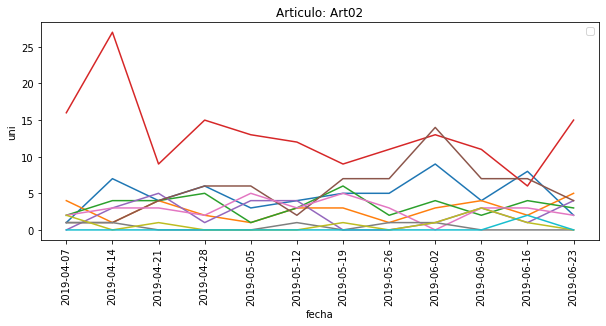

In [5]:
np.random.seed(19970808)
test_id = np.random.choice(ventas["sku"].unique(), 1)[0]
ventas_test = ventas[ventas["sku"]==test_id]
test_loc = (np.random.choice(ventas_test["loc"].unique(), 10))
ventas_test = ventas_test[ventas_test["loc"].isin(test_loc)]

plt.figure(figsize=(10,4))
sns.lineplot(x=ventas_test.index, y=ventas_test["uni"], hue=ventas_test["loc"])
plt.xticks(rotation=90)
plt.legend([])
plt.title("Articulo: "+test_id)
plt.show()

### Todos los articulos de varias tiendas

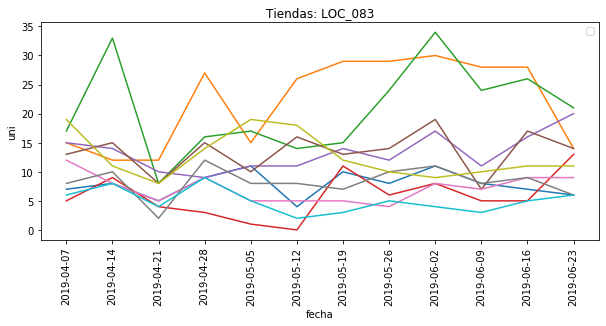

In [6]:
np.random.seed(19970808)
test_id = np.random.choice(ventas["loc"].unique(), 1)[0]
ventas_test = ventas[ventas["loc"]==test_id]


plt.figure(figsize=(10,4))
sns.lineplot(x=ventas_test.index, y=ventas_test["uni"], hue=ventas_test["sku"])
plt.xticks(rotation=90)
plt.legend([])
plt.title("Tiendas: "+test_id)
plt.show()

### Histogramas de las ventas

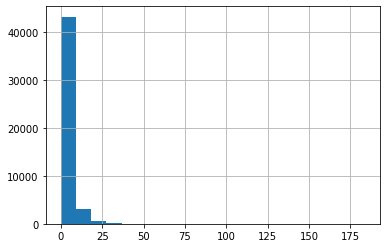

In [7]:
ventas.uni.hist(bins=20)

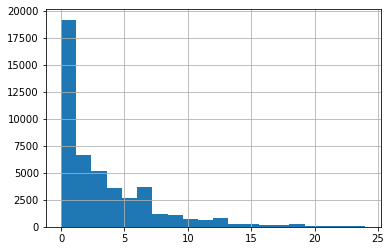

In [8]:
ventas[ventas.uni<25].uni.hist(bins=20)

### Resumen las series

In [32]:
ventas_summary = ventas.groupby(["sku", "loc"]).uni.agg(
    {"mean", "max", "min", "std", "sum", lambda x: sum(x==0)}).reset_index()

ventas_summary.rename(columns={"<lambda_0>":"count_zeros",
    "mean":"uni_mean", "max":"uni_max", "min":"uni_min", "std":"uni_std", "sum":"uni_sum"}, inplace=True)

In [33]:
ventas_summary.sort_values("count_zeros", ascending=False)

,sku,loc,count_zeros,uni_min,uni_std,uni_max,uni_sum,uni_mean
1739,Art05,LOC_189,11.0,0.0,0.288675,1.0,1.0,0.083333
1651,Art04,LOC_417,11.0,0.0,0.288675,1.0,1.0,0.083333
174,Art01,LOC_178,11.0,0.0,0.866025,3.0,3.0,0.250000
744,Art02,LOC_337,11.0,0.0,0.288675,1.0,1.0,0.083333
1355,Art04,LOC_116,11.0,0.0,0.288675,1.0,1.0,0.083333
...,...,...,...,...,...,...,...,...
1965,Art06,LOC_095,0.0,12.0,6.210329,32.0,219.0,18.250000
1,Art01,LOC_002,0.0,1.0,2.539088,9.0,55.0,4.583333
1963,Art06,LOC_093,0.0,3.0,6.721742,27.0,114.0,9.500000
1960,Art06,LOC_090,0.0,2.0,1.781640,8.0,53.0,4.416667


## Preguntas interesantes

In [59]:
ventas_summary = pd.merge(ventas_summary, catalogo, on="sku", how="left")

In [61]:
ventas_summary["ganancias_sum"] = ventas_summary["uni_sum"]*ventas_summary["ganancia_uni"]

In [62]:
ventas_summary

,sku,loc,count_zeros,uni_min,uni_std,uni_max,uni_sum,uni_mean,precio,costo,tiempovidaanaquel,tamano_surtido,ganancia_uni,pro_ganacia,ganancias_sum
0,Art01,LOC_001,0.0,2.0,4.795042,17.0,103.0,8.583333,7.77,5.44,14.0,1.0,2.33,0.428309,239.99
1,Art01,LOC_002,0.0,1.0,2.539088,9.0,55.0,4.583333,7.77,5.44,14.0,1.0,2.33,0.428309,128.15
2,Art01,LOC_003,0.0,3.0,2.539088,12.0,77.0,6.416667,7.77,5.44,14.0,1.0,2.33,0.428309,179.41
3,Art01,LOC_004,0.0,4.0,4.273775,18.0,131.0,10.916667,7.77,5.44,14.0,1.0,2.33,0.428309,305.23
4,Art01,LOC_005,0.0,3.0,4.114829,16.0,117.0,9.750000,7.77,5.44,14.0,1.0,2.33,0.428309,272.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,Art10,LOC_413,10.0,0.0,6.634962,23.0,27.0,2.250000,29.32,20.52,10.0,1.0,8.80,0.428850,237.60
3925,Art10,LOC_414,10.0,0.0,0.621582,2.0,3.0,0.250000,29.32,20.52,10.0,1.0,8.80,0.428850,26.40
3926,Art10,LOC_415,7.0,0.0,0.792961,2.0,7.0,0.583333,29.32,20.52,10.0,1.0,8.80,0.428850,61.60
3927,Art10,LOC_416,1.0,0.0,0.937437,3.0,22.0,1.833333,29.32,20.52,10.0,1.0,8.80,0.428850,193.60


In [41]:
ventas_summary.sort_values("uni_sum", ascending=False).head(1000).groupby("sku").sum()

,count_zeros,uni_min,uni_std,uni_max,uni_sum,uni_mean
sku,,,,,,
Art01,99.0,290.0,694.736694,2531.0,14878.0,1239.833333
Art02,10.0,612.0,524.546750,2345.0,16596.0,1383.000000
Art03,25.0,783.0,669.858494,2977.0,21833.0,1819.416667
Art04,54.0,21.0,179.457389,576.0,3136.0,261.333333
Art05,9.0,468.0,366.980293,1683.0,12426.0,1035.500000
Art06,20.0,736.0,631.839912,2856.0,19991.0,1665.916667
Art07,5.0,226.0,212.396642,925.0,6463.0,538.583333
Art08,5.0,119.0,144.969610,617.0,4010.0,334.166667
Art09,5.0,158.0,135.784951,604.0,4321.0,360.083333


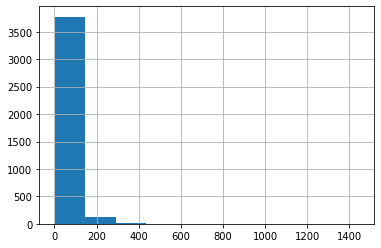

In [34]:
ventas_summary.uni_sum.hist()

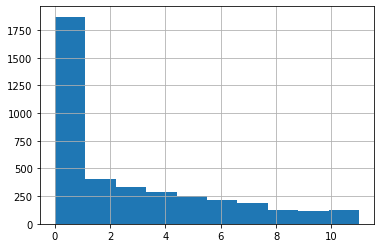

In [29]:
ventas_summary.count_zeros.hist()